In [1]:
#%matplotlib notebook# Nevarne vode... to je za interakcijo 3d plotov ampak v VSC je buggano. Ce zazenes in ne funkcionira je nujen restart kernela.

# PCA analiza

In [2]:
import pandas as pd
import numpy as np

data = pd.read_excel("data.xlsx")
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

X = data.drop("responder", axis=1)
y = data["responder"]

manjkajoce = X.isnull().sum()
meja = 0.2
for col in X.columns:
    if manjkajoce[col] > 0:
        # Imputiramo manjkajoče vrednosti
        if manjkajoce[col] < len(X)*meja:
            if X[col].dtype == 'float64':
                X[col].fillna(X[col].mean(), inplace=True)
            else:
                X[col].fillna(X[col].mode()[0], inplace=True)
        # ali pa stolpcec zavržemo
        else:
            X.drop(col, axis=1, inplace=True)

X = pd.DataFrame(X).to_numpy()
y = pd.DataFrame(y).to_numpy()

from operator import add
from functools import reduce

y = [reduce(add, lst) for lst in y]
y = np.array(y)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

Skaliramo podatke

In [4]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)

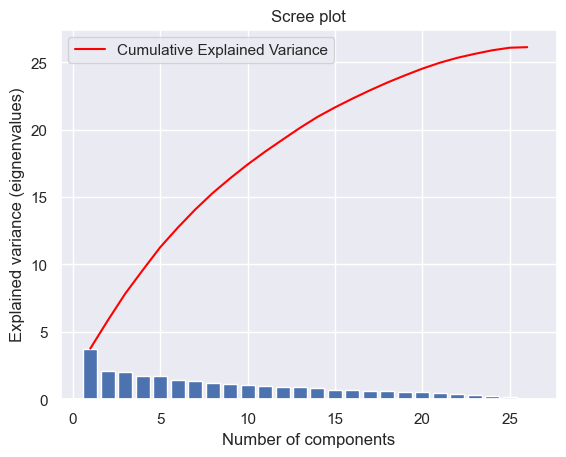

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 22 to 5 features with PCA
pca = PCA(n_components=None)
 
# Fit and transform data
reduced_features = pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

## 2D vizualizacija

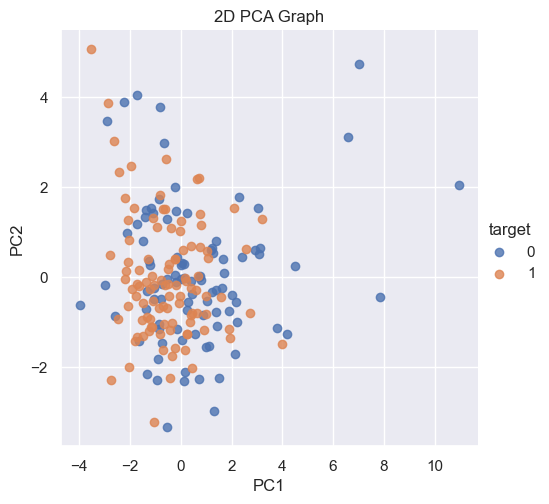

In [6]:
# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)
 
# Fit and transform data
pca_features = pca.fit_transform(x_scaled)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

pca_df['target'] = y
 

import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df,
    hue='target',
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

## 3D Vizualizacija

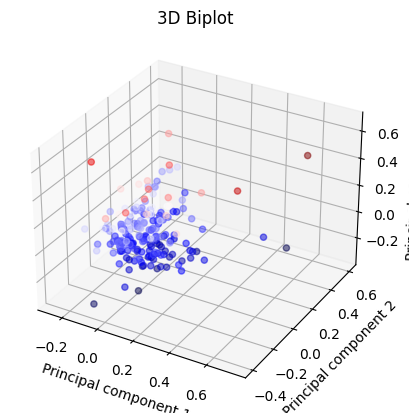

In [7]:
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('default')
 
pca = PCA(n_components=3)
 
# Fit and transform data
pca_features = pca.fit_transform(x_scaled)

#feature_names = df.feature_names
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])
 
# Apply the targett names
pca_df['target'] = y
 
# Create the scaled PCA dataframe
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
 
# Initialize the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
# Define scaled features as arrays
xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']
 
# Plot 3D scatterplot of PCA
ax.scatter3D(
    xdata, 
    ydata, 
    zdata, 
    c=zdata,
    cmap='seismic', 
    alpha=0.5)
 
# Define the x, y, z variables
loadings = pca.components_
xs = loadings[0]
ys = loadings[1]
zs = loadings[2]
 
# Plot the loadings
"""for i, varnames in enumerate(feature_names):
    ax.scatter(xs[i], ys[i], zs[i], s=200)
    ax.text(
        xs[i] + 0.1, 
        ys[i] + 0.1, 
        zs[i] + 0.1, 
        varnames)"""
 
# Plot the arrows
"""x_arr = np.zeros(len(loadings[0]))
y_arr = z_arr = x_arr
ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs)"""
 
# Plot title of graph
plt.title(f'3D Biplot')
 
# Plot x, y, z labels
ax.set_xlabel('Principal component 1', rotation=150)
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3', rotation=60)
 
plt.show()

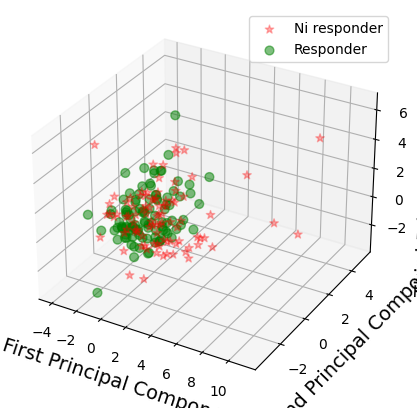

In [8]:

pca = PCA(n_components=3)
pca.fit(x_scaled) 
x_pca = pca.transform(x_scaled) 

ex_variance=np.var(x_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = x_pca[:,0]
Yax = x_pca[:,1]
Zax = x_pca[:,2]

cdict = {0:'red',1:'green'}
labl = {0:'Ni responder',1:'Responder'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()